# Logistic Regression

Resources:https://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/

The logistic regression model takes real-valued inputs and makes a prediction as to the probability of the input belonging to the default class (class 0).

If the probability is > 0.5 we can take the output as a prediction for the default class (class 0), otherwise the prediction is for the other class (class 1).

For this dataset, the logistic regression has three coefficients just like linear regression, for example:

*                         output = b0 + b1*x1 + b2*x2

The job of the learning algorithm will be to discover the best values for the coefficients (b0, b1 and b2) based on the training data.

Unlike linear regression, the output is transformed into a probability using the logistic function:

*                         p(class=0) = 1 / (1 + e^(-output))

In your spreadsheet this would be written as:

*                        p(class=0) = 1 / (1 + EXP(-output))



# Logistic Regression by Stochastic Gradient Descent

We can estimate the values of the coefficients using stochastic gradient descent.

This is a simple procedure that can be used by many algorithms in machine learning. It works by using the model to calculate a prediction for each instance in the training set and calculating the error for each prediction.

We can apply stochastic gradient descent to the problem of finding the coefficients for the logistic regression model as follows:

Given each training instance:
* Calculate a prediction using the current values of the coefficients.
* Calculate new coefficient values based on the error in the prediction.

The process is repeated until the model is accurate enough (e.g. error drops to some desirable level) or for a fixed number iterations. You continue to update the model for training instances and correcting errors until the model is accurate enough orc cannot be made any more accurate. It is often a good idea to randomize the order of the training instances shown to the model to mix up the corrections made.

By updating the model for each training pattern we call this online learning. It is also possible to collect up all of the changes to the model over all training instances and make one large update. This variation is called batch learning and might make a nice extension to this tutorial if you’re feeling adventurous.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## S-Shaped Curve of **Sigmoid Function**

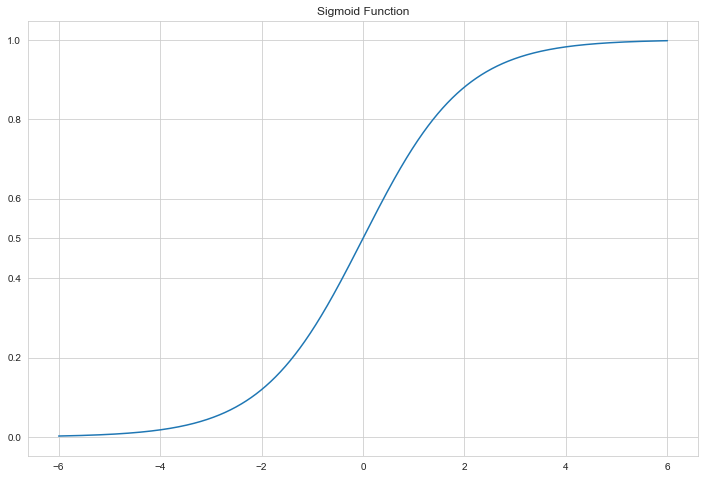

In [99]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (12,8))
plt.plot(x, 1 / (1 + np.exp(-x))); # Sigmoid Function
plt.title("Sigmoid Function")
yticks = [0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0]
plt.yticks(yticks)
plt.show()

# Logistic Regression Model Building

In [53]:
from sklearn import datasets
import pandas as pd

In [54]:
iris = datasets.load_iris()

In [55]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["Species"] = iris.target

In [89]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
df["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

**Making it Binary Classfication**

In [58]:
df[df["Species"] != 0] = 1

In [59]:
df["Species"].value_counts()

1    100
0     50
Name: Species, dtype: int64

In [77]:
X = df.drop("Species", axis = 1).values
y = df.Species.values

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [79]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

**Evaluation**

In [80]:
prediction = classifier.predict(X_valid).reshape(-1,1)

In [84]:
y_valid = y_valid.reshape(-1, 1)

In [86]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_valid, prediction)

<AxesSubplot:>

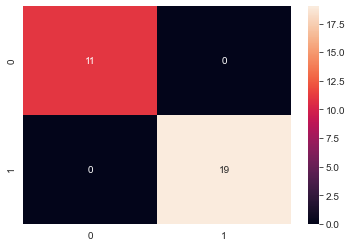

In [88]:
sns.heatmap(matrix, annot = True)